In [162]:
from decimal import Decimal
import random
import copy
import matplotlib.pyplot as plt
import numpy as np

In [163]:
class PriorityQueue(object):
    """
    Implementation of the queue data structure
    """
    def __init__(self):
        self.l = 0
        self.queue = []      
    
    def enqueue(self, item):
        """
        Add new item to the queue
        """
        
        self.queue.append(item)
        self.l += 1
        j = self.l - 2
        while (j >= 0) and (item[1] < self.queue[j][1]):
            self.queue[j+1] = self.queue[j]
            j -= 1
        self.queue[j+1] = item    
        
    def dequeue(self):
        """
        Remove item with lowest key
        """
        x = self.queue[self.l-1]
        self.l -= 1
        return x[1]

In [164]:
def evaluation(x,y):
    x = Decimal(x)
    y = Decimal(y)
    
    z = (Decimal(1.5) - x + x*y)**2 + (Decimal(2.25) - x + x*y*y)**2 + (Decimal(2.625) - x + x*y*y*y)**2
    z = float(z)
    return z

In [165]:
def position_init():
    x = random.uniform(-4.5,4.5)
    y = random.uniform(-4.5,4.5)

    xy = np.array([x, y])
    
    return xy

In [166]:
def swarm(N):
    S = []
    for i in range(N):
        indiv = position_init()
        S.append(indiv)
    S = np.array(S)
    return S

In [167]:
def init_velocity_zero(N):
    vo = []
    for i in range(N):
        vo.append([0,0])
    vo = np.array(vo)
    return vo

In [170]:
def global_minima_index(P):
    f_pi = []
    for i in P:
        f_pi.append(np.array([evaluation(i[0],i[1])]))

    g = f_pi.index(min(f_pi))
    return g

In [171]:
def update_velocity(vio,g,P,S):
    alpha_1 = 1
    alpha_2 = 1
    phi_1 = random.uniform(0,1)
    phi_2 = random.uniform(0,1)
    vi = []
    for i in range(len(vio)):
        vi.append(vio[i] + alpha_1*phi_1*(P[i] - S[i]) + alpha_2*phi_2*(P[g] - S[i]))
    vi = np.array(vi)
    return vi

Initial Velocity 0

In [289]:
N = 100
epoch = 100

S = swarm(N)
vi = init_velocity_zero(N)
P = copy.deepcopy(S)
g = global_minima_index(P)

x_convergence = []
y_convergence = []
z_convergence = []

for i in range(epoch):
    vi = update_velocity(vi,g,P,S)
    S = S + vi
    for j in range(len(S)):
        if evaluation(S[j,0],S[j,1]) < evaluation(P[j,0],P[j,1]):
            P[j] = S[j]
    g = global_minima_index(P)
    x_convergence.append(P[g,0])
    y_convergence.append(P[g,1])
    z_convergence.append(evaluation(P[g,0],P[g,1]))

Final value of X: 2.9903806415250247


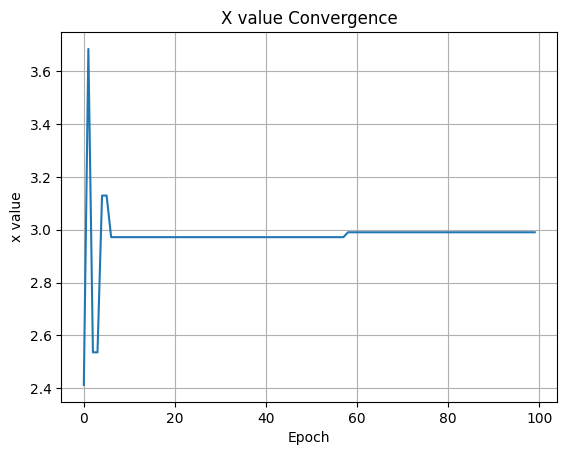

In [290]:
plt.plot(x_convergence)
plt.grid(True)
plt.xlabel('Epoch')
plt.ylabel('x value')
plt.title('X value Convergence')
print("Final value of X: " + str(x_convergence[99]))

Final value of X: 0.4992919737773531


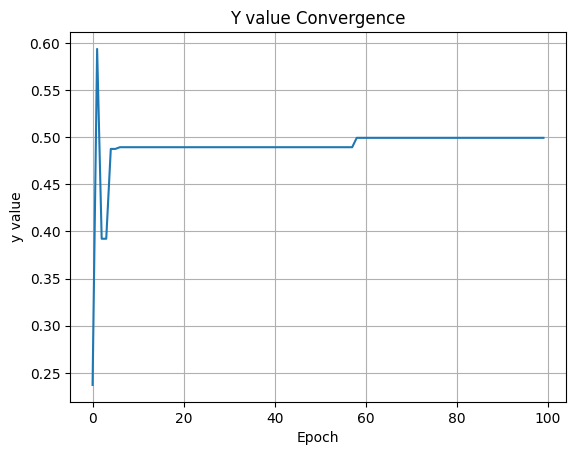

In [291]:
plt.plot(y_convergence)
plt.grid(True)
plt.xlabel('Epoch')
plt.ylabel('y value')
plt.title('Y value Convergence')
print("Final value of X: " + str(y_convergence[99]))

Final value of f(x,y): 7.991210623669769e-05


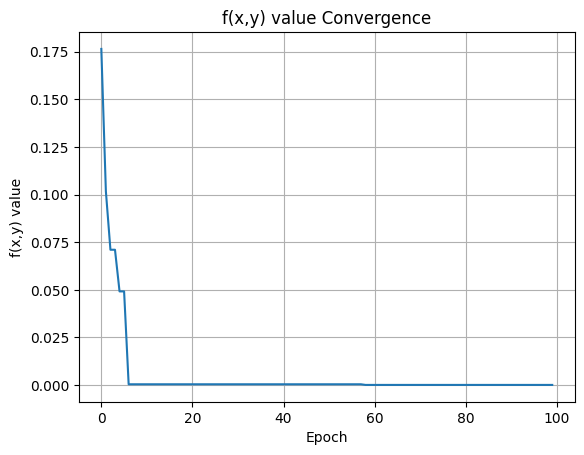

In [292]:
plt.plot(z_convergence)
plt.grid(True)
plt.xlabel('Epoch')
plt.ylabel('f(x,y) value')
plt.title('f(x,y) value Convergence')
print("Final value of f(x,y): " + str(z_convergence[99]))

Initial Velocity Random

In [326]:
def init_velocity_random(N):
    vo = []
    for i in range(N):
        vo.append([random.uniform(-2,2),random.uniform(-2,2)])
    vo = np.array(vo)
    return vo

In [336]:
N = 100
epoch = 100

S2 = swarm(N)
vi2 = init_velocity_random(N)
P2 = copy.deepcopy(S)
g2 = global_minima_index(P)

x2_convergence = []
y2_convergence = []
z2_convergence = []

for i in range(epoch):
    vi2 = update_velocity(vi2,g2,P2,S2)
    S2 = S2 + vi2
    for j in range(len(S2)):
        if evaluation(S2[j,0],S2[j,1]) < evaluation(P2[j,0],P2[j,1]):
            P2[j] = S2[j]
    g2 = global_minima_index(P2)
    x2_convergence.append(P2[g2,0])
    y2_convergence.append(P2[g2,1])
    z2_convergence.append(evaluation(P2[g2,0],P2[g2,1]))

Final value of X: 2.9603362144355936


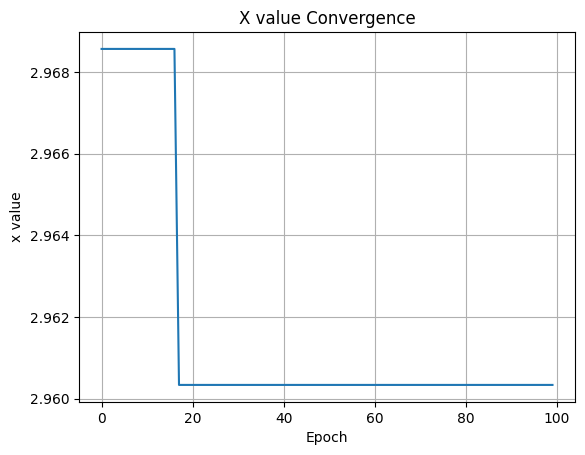

In [337]:
plt.plot(x2_convergence)
plt.grid(True)
plt.xlabel('Epoch')
plt.ylabel('x value')
plt.title('X value Convergence')
print("Final value of X: " + str(x2_convergence[99]))

Final value of X: 0.48990289980905366


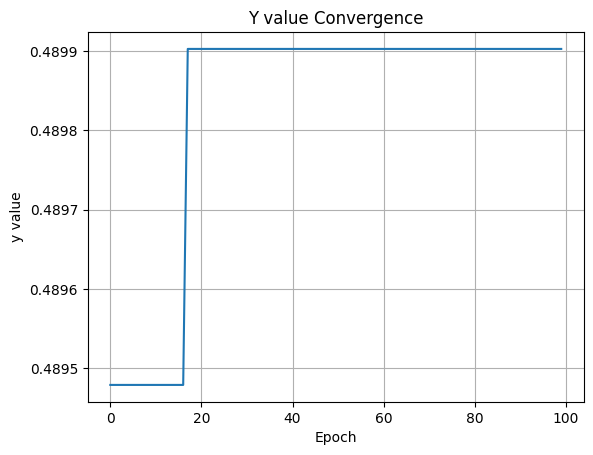

In [338]:
plt.plot(y2_convergence)
plt.grid(True)
plt.xlabel('Epoch')
plt.ylabel('y value')
plt.title('Y value Convergence')
print("Final value of X: " + str(y2_convergence[99]))

Final value of f(x,y): 0.0002634477234699404


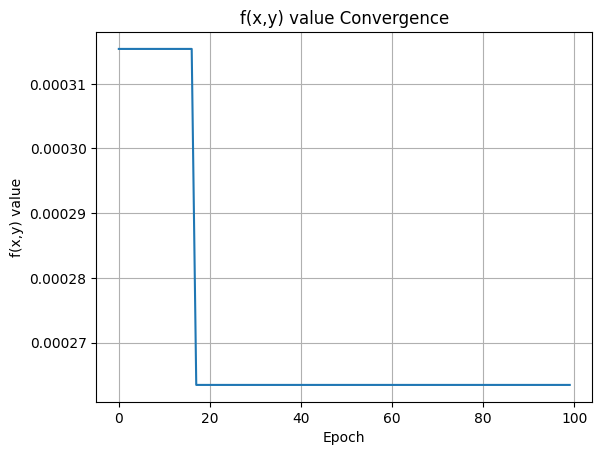

In [339]:
plt.plot(z2_convergence)
plt.grid(True)
plt.xlabel('Epoch')
plt.ylabel('f(x,y) value')
plt.title('f(x,y) value Convergence')
print("Final value of f(x,y): " + str(z2_convergence[99]))